<a href="https://colab.research.google.com/github/Lolo-17/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module3-dimensionality-reduction/LS_DS_133_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
# importing libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

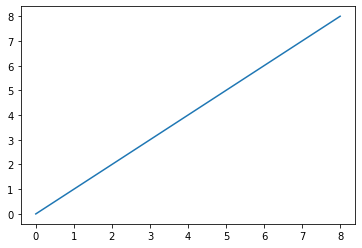

In [ ]:
# Graph 1 - It passes vertical test
x = [0,2,4,6,8]
y = [0,2,4,6,8]

plt.plot(x,y)
plt.show()

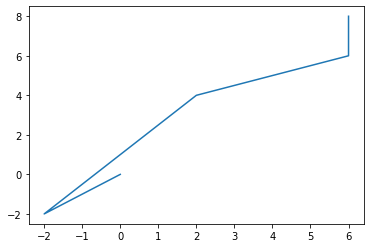

In [ ]:
# Graph 2 - It fails the vertical test
x = [0,-2,2,6,6]
y = [0,-2,4,6,8]

plt.plot(x,y)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because a function has only one unique **x** input while **y** has one output.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

**Relation 2 is a function because it passes the vertical test.**

In [ ]:
R1x = [1,3,1]
R1y = [2,2,3]
plt.plot(R1x,R1y)
plt.show()

In [ ]:
R2x = [1,2,6]
R2y = [3,3,7]
plt.plot(R2x,R2y)
plt.show()

In [ ]:
R3x = [9,2,9]
R3y = [4,1,6]
plt.plot(R3x,R3y)
plt.show()

In [ ]:
R4x = [6,8,6]
R4y = [2,3,4]
plt.plot(R4x,R4y)
plt.show()

In [ ]:
R5x = [2,2,2]
R5y = [6,7,4]
plt.plot(R5x,R5y)
plt.show()

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Function **m** has 3 dimensions and function **n** has 4 dimensions. So, **m**

has 3 outputs and **n** has 2 output.

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

No. If a function is made with one input, we can't simply add another

input. We need to create another function with two inputs in order to

go to higher dimensions.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

**Vector #1**

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\-x_1+2x_2\\  \end{bmatrix}\end{align}
\
\begin{align}
p(\begin{bmatrix}1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 1 + 3(0) \\-(1) + 2(0) \\  \end{bmatrix} = \begin{bmatrix}1 \\-1 \end{bmatrix}\end{align}
\
\begin{align}
p(\begin{bmatrix}0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 0 + 3(1) \\-(0) + 2(1) \\  \end{bmatrix} = \begin{bmatrix} 3\\ 2 \end{bmatrix}\end{align}
\
\begin{align}
\begin{bmatrix} 1 & 3\\ -1 & 2\end{bmatrix}\begin{bmatrix} x_1 \\ x_2\end{bmatrix}= \begin{bmatrix} x_1 + 3x_2\\ -x_1 + 2x_2\end{bmatrix}
 \end{align}

**Vector #2**

\begin{align}
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\  -x_1 +2 x_2 + 3x_3 \\ 5x_1 + x_2 - 2x_3 \end{bmatrix}
\end{align}
\
\begin{align}
q(\begin{bmatrix}1 \\ 0 \\ 0\end{bmatrix}) = \begin{bmatrix} 4(1) + 0 + 2(0) \\  -1 + 2(0) + 3(0) \\ 5(1) + 0 - 2(0) \end{bmatrix}=\begin{bmatrix}4\\-1\\5
\end{bmatrix}
\end{align}
\
\begin{align}
q(\begin{bmatrix}0 \\ 1 \\ 0\end{bmatrix}) = \begin{bmatrix} 4(0) + 1 + 2(0) \\  -(0) +2(1)  + 3(0) \\ 5(0) + 1 - 2(0) \end{bmatrix}=\begin{bmatrix}1\\2\\1
\end{bmatrix}
\end{align}
\
\begin{align}
q(\begin{bmatrix}0 \\ 0 \\ 1\end{bmatrix}) = \begin{bmatrix} 4(0) + 0 + 2(1) \\  -(0) +2(0) + 3(1) \\ 5(0) + 0 - 2(1) \end{bmatrix}=\begin{bmatrix}2\\3\\-2
\end{bmatrix}
\end{align}
\
\begin{align}
\begin{bmatrix} 4&1&2\\-1&2&3\\5&1&-2\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}= \begin{bmatrix}4x_1+x_2+2x_3\\-x_1+2x_2+3x_3\\5x_1+x_2-2x_3\end{bmatrix}
 \end{align}

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An eigenvector is any vector that doesn't change its orientation during a given transformation, but an eigenvector might still get scaled by some scalar. It can get stretched or squished, it just can't change the direction in which it is pointing. An eigenvalue is the scalar that represents how its corresponding eigenvector was scaled during the transformation. Eigenvectors and eigenvalues always come in pairs.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The challenges are working with large amount of datasets and it's difficult

to explore data and visualize.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Have 5 times the number of observations as you have parameters in your model.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [ ]:
# Read National Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

In [ ]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

In [ ]:
# check for null values
national.isnull().sum().any()

In [ ]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

In [ ]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

In [ ]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

In [ ]:
# Now we only have numeric columns (ints and floats)
national_processed.dtypes

In [ ]:
# Creating 99 PCA columns
nums = list(range(1,100))
pc = 'PC'
for v in nums:
  print("'",pc,v,"'",",",sep='')

In [157]:
# Performing PCA

# Standardize our Data
scaler = StandardScaler()
Z = scaler.fit_transform(national_processed)

# Extract new features with PCA
pca = PCA()
new_features = pca.fit_transform(Z)
# Turn our new_features into a dataframe
new_features = pd.DataFrame(new_features)
new_features.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12',
                        'PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23',
                        'PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34',
                        'PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45',
                        'PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56',
                        'PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67',
                        'PC68','PC69','PC70','PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78',
                        'PC79','PC80','PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89',
                        'PC90','PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99',]
new_features.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,...,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99
0,-2.576570,-1.376127,-1.253835,-0.619882,1.592855,-2.529629,-1.024384,2.038971,0.743631,-0.981357,-0.958024,-0.983633,-0.124320,2.130272,-0.232511,-1.259668,-1.811215,0.800230,0.157496,0.057891,0.076233,-0.303851,0.234631,0.311692,1.414847,0.665575,0.206075,0.297168,-0.885343,-1.100812,0.017568,-0.296827,-0.045226,0.328718,-0.227059,-0.206567,0.105183,0.209632,-0.452949,0.487132,...,-0.022755,-0.005380,0.017097,0.017509,0.007771,-0.001771,-0.005635,0.002438,0.000044,-1.555674e-12,-2.275710e-12,-7.244823e-12,-2.792285e-12,1.391321e-13,2.899610e-12,-1.398466e-12,5.030034e-12,-1.453494e-12,-7.971580e-15,-8.595370e-16,1.397316e-15,-4.201700e-15,-2.629575e-15,1.662437e-15,2.281487e-16,-8.200807e-15,7.638178e-15,2.129641e-15,1.126562e-15,4.763201e-15,-1.111901e-15,1.643459e-15,-2.481185e-15,1.627337e-15,4.206682e-16,2.517816e-15,4.136666e-15,6.081237e-15,-5.551242e-16,-7.942743e-16
1,2.040643,-0.988061,-2.237999,-2.987403,2.160320,1.220875,1.076368,-0.681369,0.948055,-0.182382,-0.690309,0.670541,-0.312950,0.160716,0.063940,-0.032742,-1.310611,-0.029583,-0.320912,-1.213295,0.082541,-0.438037,-0.140961,-0.417153,0.129375,-0.373254,0.162462,0.426850,-0.294672,1.196620,0.034442,0.739189,-0.334534,-0.349723,-0.051191,0.107043,0.952603,0.199457,0.022768,0.199969,...,-0.065489,0.030766,-0.021506,-0.014176,0.010088,0.000578,-0.010665,-0.002009,-0.000083,1.985665e-11,1.697024e-11,-1.820959e-11,-4.569093e-12,-8.943151e-12,-1.002888e-11,3.043135e-12,-1.867900e-12,-7.525301e-12,-1.236942e-13,-2.811725e-14,-2.859341e-15,-1.245108e-14,6.380007e-15,-3.271522e-14,6.700829e-14,3.538613e-14,-3.039974e-14,-1.604190e-14,-5.531218e-15,7.315701e-15,-9.227129e-15,-2.709105e-15,-3.293959e-15,4.693389e-15,-3.784732e-15,7.904892e-15,-1.024321e-14,-7.866356e-15,-6.322116e-16,-2.619343e-16
2,1.215270,0.370168,-3.248606,-2.123899,1.229951,-2.559945,0.984291,0.088488,-0.209300,-0.715159,-0.243996,1.168680,-0.136100,0.491252,0.358669,-0.462415,-1.494570,0.114951,-0.160159,-0.889462,0.678651,-0.002222,0.162761,-0.738769,-0.844579,0.332651,-0.014602,0.525549,-0.134705,0.832489,-0.366875,0.429854,-0.639612,-0.112777,-0.114059,0.258893,0.974611,0.167855,0.177374,-0.033658,...,-0.037108,0.019828,-0.032203,0.003294,0.006182,0.000272,-0.008307,0.000210,0.000053,-3.011104e-11,-3.448156e-11,-2.696771e-12,-1.342672e-11,3.055270e-11,-1.853116e-11,6.526787e-12,1.171080e-11,2.918130e-11,1.978506e-14,-6.917647e-15,-8.690510e-15,3.585682e-15,-4.658132e-15,-8.145799e-15,-4.673181e-16,-5.639147e-15,-2.337729e-15,-5.838861e-15,2.205696e-15,-2.530473e-15,-4.543976e-16,-6.528784e-15,-2.303640e-15,-2.500232e-15,2.893038e-15,2.086186e-15,1.598883e-15,3.318875e-15,8.989284e-16,-3.788372e-17
3,2.821837,1.723711,-4.375157,-1.479343,0.085327,-1.755050,0.710440,-0.064843,0.487051,-0.175074,-0.947811,0.273949,-0.083829,-0.606772,-0.058791,0.293943,-1.319074,1.225816,-0.688633,-0.437567,-0.155818,-0.934189,0.070781,0.082882,0.259157,-0.305200,-0.157419,0.136505,-0.678651,0.363593,-0.497262,0.453585,0.099106,0.302715,-0.319196,0.502472,-0.056209,0.043986,0.284494,0.152548,...,0.051131,-0.016479,0.032716,-0.001735,-0.006142,-0.000083,0.003233,0.000369,0.000047,1.570527e-11,-2.956002e-11,-4.246039e-11,-3.625665e-11,-3.904595e-11,-8.910011e-12,2.530238e-12,7.069996e-12,3.740412e-13,8.286938e-15,6.592696e-16,-1.280837e-15,9.213680e-16,-3.869037e-17,1.861092e-16,-3.535306e-16,2.137629e-15,-3.969571e-16,-1.665115e-15,2.604798e-15,-3.388406e-15,3.325411e-16,-1.605029e-15,-2.185016e-15,-2.579443e-15,3.379958e-15,1.414309e-15,-3.038426e-15,-1.618005e-15,-2.137277e-16,-7.535854e-16
4,-1.570106,-0.878362,-3.307062

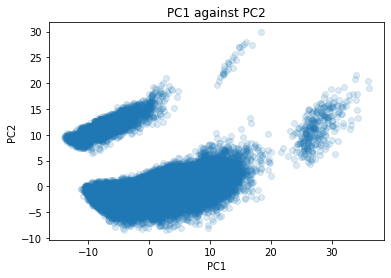

In [166]:
# Graphing PC1 agaisnt PC2
plt.scatter(new_features['PC1'], new_features['PC2'], alpha=.15)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

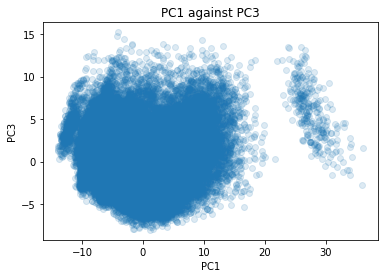

In [167]:
# Graphing PC1 agaisnt PC3
plt.scatter(new_features['PC1'], new_features['PC3'], alpha=.15)
plt.title('PC1 against PC3')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()

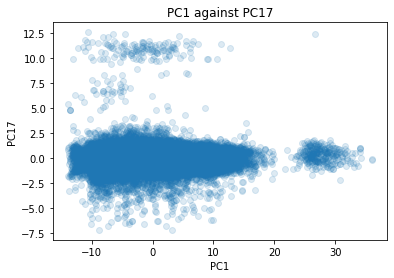

In [171]:
# Graphing PC1 agaisnt PC17, my favorite number
plt.scatter(new_features['PC1'], new_features['PC17'], alpha=.15)
plt.title('PC1 against PC17')
plt.xlabel('PC1')
plt.ylabel('PC17')
plt.show()

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)